In [1]:
#import needed libraries
import os
import pandas as pd
import numpy as np

#import plotting libraries
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#import preprocesing libraries and packages
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

#import modelling libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [2]:
os.getcwd()

'/home/jeremiah'

In [3]:
os.chdir('/home/jeremiah/Documents/intercampusai2019')

In [4]:
#read in files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df = train.append(test, ignore_index=True)
my_sub = pd.read_csv('sample_submission2.csv')

/home/jeremiah/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


## Exploratory Data Analysis

#### Check overview of files

In [5]:
train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [6]:
test.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

###### Check unique groups per column

In [8]:
train['Previous_IntraDepartmental_Movement'].value_counts()

No     34709
Yes     3603
Name: Previous_IntraDepartmental_Movement, dtype: int64

In [9]:
train['Past_Disciplinary_Action'].value_counts()

No     38161
Yes      151
Name: Past_Disciplinary_Action, dtype: int64

In [10]:
train['Marital_Status'].value_counts()

Married     31022
Single       6927
Not_Sure      363
Name: Marital_Status, dtype: int64

In [11]:
train['Foreign_schooled'].value_counts()

Yes    34995
No      3317
Name: Foreign_schooled, dtype: int64

In [12]:
train['State_Of_Origin'].value_counts()

LAGOS          6204
FCT            2389
OGUN           2302
RIVERS         2222
ANAMBRA        1710
KANO           1649
DELTA          1594
OYO            1508
KADUNA         1399
IMO            1307
EDO            1259
ENUGU          1025
ABIA            950
OSUN            929
ONDO            875
NIGER           857
KWARA           765
PLATEAU         739
AKWA IBOM       673
NASSARAWA       632
KATSINA         615
ADAMAWA         605
BENUE           579
BAUCHI          557
KOGI            542
SOKOTO          499
CROSS RIVER     495
EKITI           455
BORNO           447
TARABA          400
KEBBI           393
BAYELSA         324
EBONYI          313
GOMBE           291
ZAMFARA         290
JIGAWA          262
YOBE            257
Name: State_Of_Origin, dtype: int64

In [13]:
train['Gender'].value_counts()

Male      26880
Female    11432
Name: Gender, dtype: int64

In [14]:
train['Channel_of_Recruitment'].value_counts()

Agency and others                  21310
Direct Internal process            16194
Referral and Special candidates      808
Name: Channel_of_Recruitment, dtype: int64

In [15]:
train["Division"].value_counts()

Commercial Sales and Marketing                 11695
Customer Support and Field Operations           7973
Sourcing and Purchasing                         5052
Information Technology and Solution Support     4952
Information and Strategy                        3721
Business Finance Operations                     1786
People/HR Management                            1704
Regulatory and Legal services                    733
Research and Innovation                          696
Name: Division, dtype: int64

In [16]:
train["Qualification"].value_counts()

First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

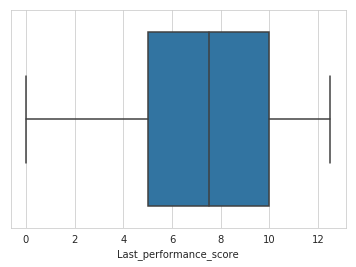

In [17]:
sns.set_style("whitegrid")
ax = sns.boxplot(x = train['Last_performance_score'])
plt.savefig("LastPerformance.png", format='png', dpi=300)

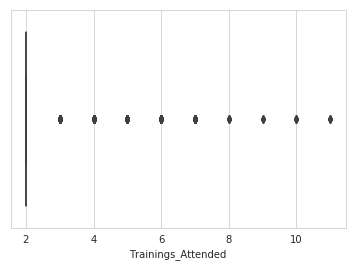

In [18]:
sns.set_style("whitegrid")
ax = sns.boxplot(x = train['Trainings_Attended'] )
plt.savefig('Trainings.png', format='png', dpi=300)

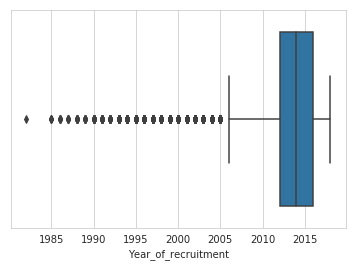

In [19]:
sns.set_style("whitegrid")
ax = sns.boxplot(x = train['Year_of_recruitment'] )
plt.savefig('RecruitmentYear.png', format='png', dpi=300)

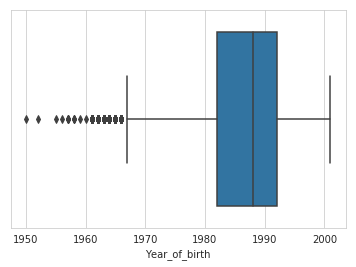

In [20]:
sns.set_style("whitegrid")
ax = sns.boxplot(x = train['Year_of_birth'])
plt.savefig('YearOfBirth.png', format = 'png', dpi=300)

In [21]:
train['Year_of_birth'].describe()

count    38312.000000
mean      1986.209334
std          7.646047
min       1950.000000
25%       1982.000000
50%       1988.000000
75%       1992.000000
max       2001.000000
Name: Year_of_birth, dtype: float64

## Feature Engineering

#### Feature Engineering Thoughts
1. Generate a new column called age and make it ordered categorical. Replace year of birth with years in service.
2. Generate a new column called Years in service and make it ordered categorical too. Replace year of recruitment.
3. Make last performance score and training score percentages.
4. Make (trainings attended) ordered categorical variables.
5. Make (Division, Qualification, Gender, Chanel of Recruitment) categorical variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3da64acc0>,
      dtype=object)

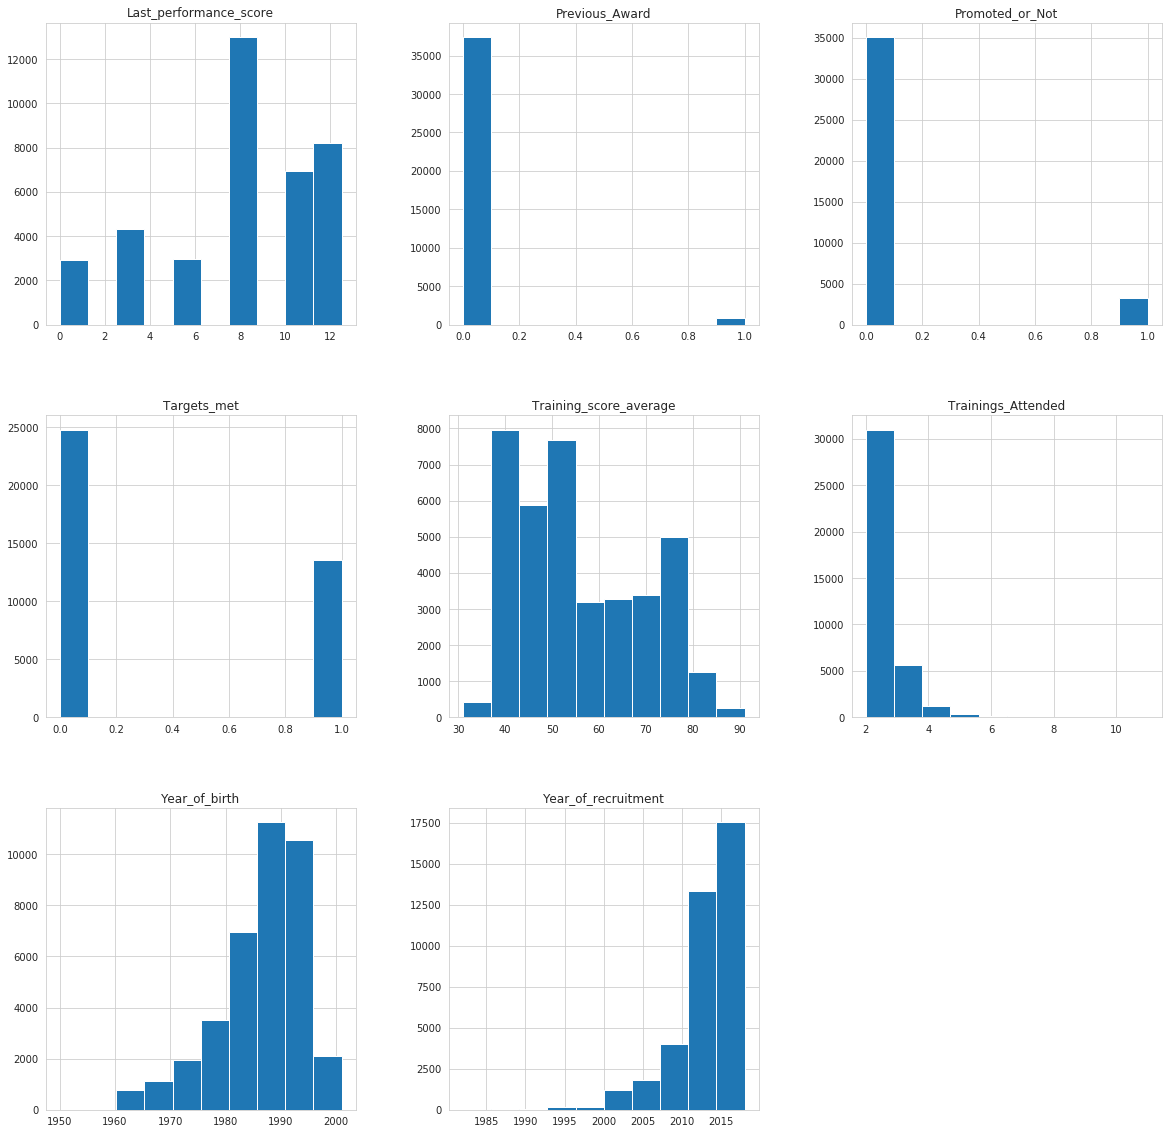

In [22]:
# Let us plot the distribution of the continuous variables and see the scale variation
train[train.dtypes[(train.dtypes == 'float64')|(train.dtypes == 'int64')].index.values].hist(figsize = [20,20])

In [23]:
#use a corrcoef matrix to determine useful features
corr_matrix = train.corr()
corr_matrix

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
Trainings_Attended,1.000000,0.078710,-0.062042,0.056215,-0.044789,-0.007409,0.041065,-0.024345
Year_of_birth,0.078710,1.000000,-0.175572,0.654666,0.025337,0.013627,0.048390,0.017991
Last_performance_score,-0.062042,-0.175572,1.000000,-0.190333,0.276350,0.026587,0.057836,0.119690
Year_of_recruitment,0.056215,0.654666,-0.190333,1.000000,0.076910,0.041995,0.037477,0.012287
Targets_met,-0.044789,0.025337,0.276350,0.076910,1.000000,0.092934,0.077201,0.224518
Previous_Award,-0.007409,0.013627,0.026587,0.041995,0.092934,1.000000,0.072360,0.201434
Training_score_average,0.041065,0.048390,0.057836,0.037477,0.077201,0.072360,1.000000,0.178448
Promoted_or_Not,-0.024345,0.017991,0.119690,0.012287,0.224518,0.201434,0.178448,1.000000


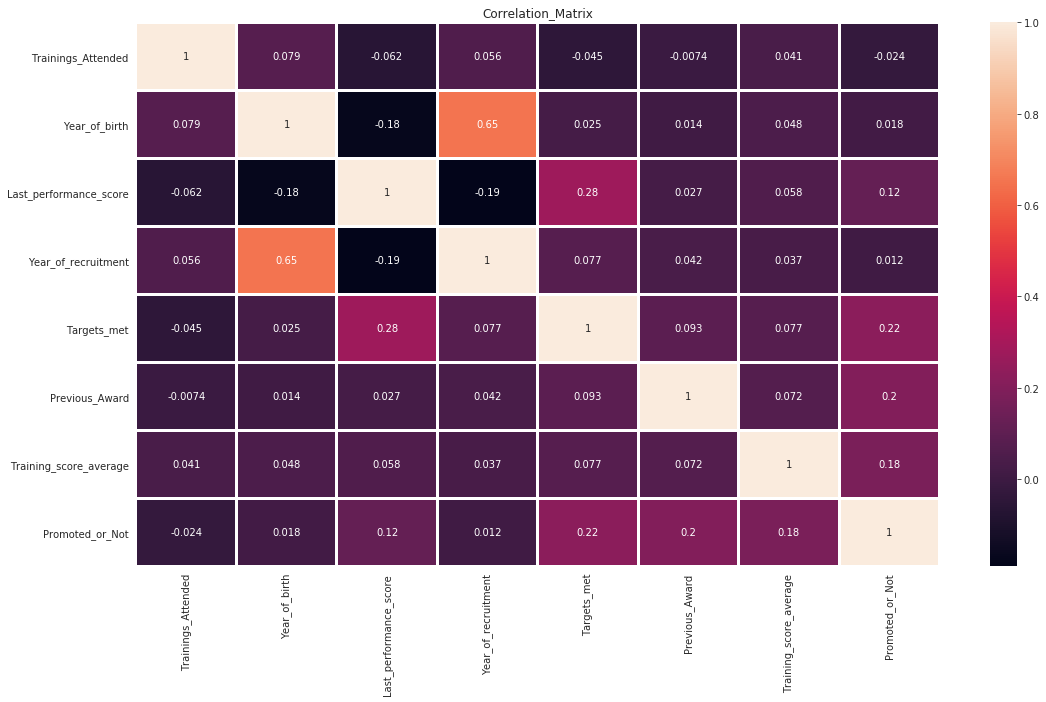

In [24]:
f, ax=plt.subplots(figsize=(18,10))
sns.heatmap(corr_matrix, linewidths=2.0, ax=ax, annot=True)
ax.set_title('Correlation_Matrix')
plt.savefig('Corr_Matrix.png', format='png', dpi=300)

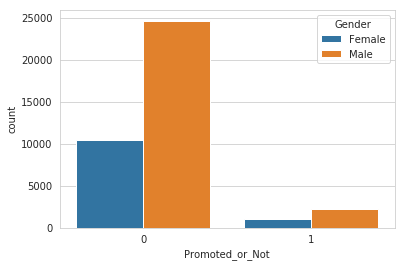

In [25]:
#Check the balance/skew of the target column
sns.countplot(x='Promoted_or_Not', hue='Gender', data=train)
plt.savefig('Gender.png', format='png', dpi=300)

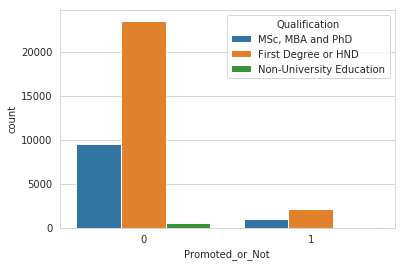

In [26]:
sns.countplot(x='Promoted_or_Not', hue='Qualification', data=train)

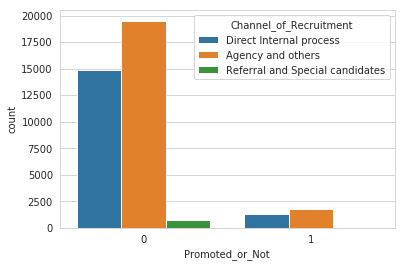

In [27]:
sns.countplot(x='Promoted_or_Not', hue='Channel_of_Recruitment', data=train)

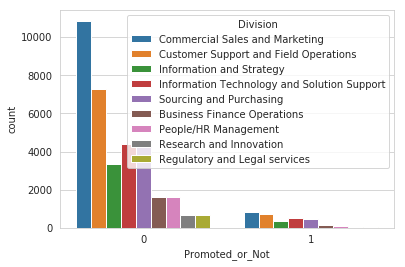

In [28]:
sns.countplot(x='Promoted_or_Not', hue='Division', data=train)

In [29]:
train['Promoted_or_Not'].value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

In [30]:
#Create a new column 'Age' benchmarking 2019 as the present year
df['Age'] = 2019 - df['Year_of_birth']

In [31]:
df['Age'].describe()

count    54808.000000
mean        32.805174
std          7.664765
min         18.000000
25%         27.000000
50%         31.000000
75%         37.000000
max         69.000000
Name: Age, dtype: float64

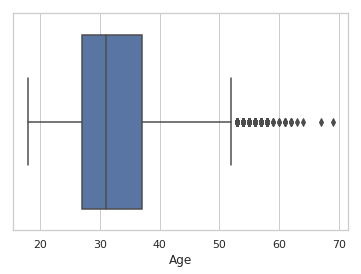

In [32]:
#Look at the distribution for 'Age'
sns.set(style ='white')
sns.set(style ='whitegrid', color_codes = True)
ax = sns.boxplot(x = df['Age'] )
plt.show()

In [33]:
#Bin the age into categories
age_cat = pd.cut(df['Age'], bins=[18,27,37,50,70], labels=['NewEntrant','Prime','Peak','Past_Peak'] )
df.insert(7,'Age_Group', age_cat)

In [34]:
#Order the values and use Integer Encoding
Recoded_age = {'Age_Group':{"NewEntrant": 1, "Prime":2, "Peak": 3, "Past_Peak":4}}
df.replace(Recoded_age, inplace=True)

In [35]:
df['Age_Group'] = df['Age_Group'].astype('category')
df['Age_Group'] = df['Age_Group'].cat.codes

In [36]:
#Recoded_training = {'Trainings_Attended':{'2':1, '3':2, '4':3, '5':4, '8':5, '6':6, '7':7, '9':8, '11':9, '10': 10}}
#df.replace(Recoded_training, inplace=True)
df['Trainings_Attended'] = df['Trainings_Attended'].astype('category')
df['Trainings_Attended'] = df['Trainings_Attended'].cat.codes

In [37]:
#Create a new column "Years in service" instead of the year of recruitment using 2019 as the baseline
df['Years_in_service'] = 2019 - df['Year_of_recruitment']

In [38]:
df['Age_Group'].value_counts()

 1    28030
 0    14340
 2    10213
 3     2112
-1      113
Name: Age_Group, dtype: int64

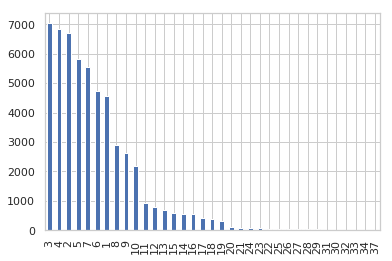

In [39]:
df['Years_in_service'].value_counts().plot.bar()
plt.show()

In [40]:
#make the "Years in service" column categorical
service_years_cat = pd.cut(df['Years_in_service'], bins =[1,5,10,15,20,40], labels=[1,2,3,4,5])
df.insert(8, 'Service_Years', service_years_cat)
df['Service_Years'] = df['Service_Years'].astype('category')
df['Service_Years'] = df['Service_Years'].cat.codes

In [41]:
#Recoded_ServYr = {'Service_Years':{'1':1, '2':2, '3':3, '4':4, '5':5}}
#df.replace(Recoded_ServYr, inplace=True)

In [42]:
#Create a column "Age at Recruitment" and make it categorical
df['Age_at_Recruitment'] = df['Year_of_recruitment'] - df['Year_of_birth']

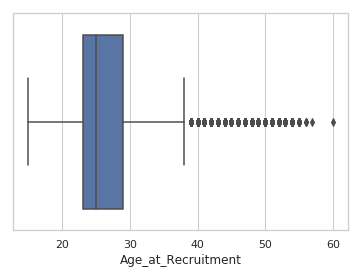

In [43]:
sns.set_style("whitegrid")
ax = sns.boxplot(x = df['Age_at_Recruitment'])
plt.savefig('RecruitmentAge.png', format='png', dpi=300)

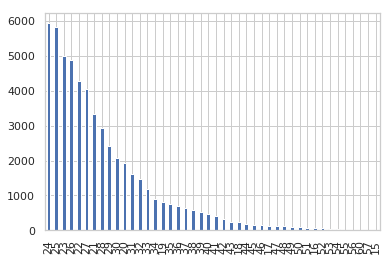

In [44]:
df['Age_at_Recruitment'].value_counts().plot.bar()

In [45]:
df['Age_at_Recruitment'].describe()

count    54808.000000
mean        26.939662
std          5.829048
min         15.000000
25%         23.000000
50%         25.000000
75%         29.000000
max         60.000000
Name: Age_at_Recruitment, dtype: float64

In [46]:
df['Age_at_Recruitment'].value_counts(normalize=True)

24    0.108287
25    0.106262
23    0.090990
26    0.088892
22    0.077927
27    0.074077
21    0.061031
28    0.053441
29    0.044045
30    0.037659
20    0.035287
31    0.029631
32    0.026693
33    0.021694
34    0.016111
19    0.014615
35    0.013848
36    0.012498
37    0.011622
38    0.010455
39    0.009579
40    0.008484
41    0.007298
42    0.006039
43    0.004525
18    0.004434
44    0.003540
45    0.002938
46    0.002591
17    0.002427
47    0.002354
48    0.002098
49    0.001934
50    0.001533
51    0.001277
16    0.001168
52    0.001058
53    0.000712
54    0.000511
55    0.000328
56    0.000055
60    0.000018
57    0.000018
15    0.000018
Name: Age_at_Recruitment, dtype: float64

In [47]:
recruit_age_cat = pd.cut(df['Age_at_Recruitment'], bins=[10,19,26,29,36,39,49,89], labels=[1,2,3,4,5,6,7])
df.insert(8,'Recruitment_Age', recruit_age_cat)
df['Recruitment_Age'] = df['Recruitment_Age'].astype('category')
df['Recruitment_Age'] = df['Recruitment_Age'].cat.codes

In [48]:
#Recoded_RecruitAge = {'Age_at_Recruitment':{'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7}}
#df.replace(Recoded_RecruitAge, inplace=True)

In [49]:
df['Division'] = df['Division'].astype('category')
df['Division'] = df['Division'].cat.codes

In [50]:
df['Channel_of_Recruitment'].value_counts()

Agency and others                  30446
Direct Internal process            23220
Referral and Special candidates     1142
Name: Channel_of_Recruitment, dtype: int64

In [51]:
df['Channel_of_Recruitment'] = df['Channel_of_Recruitment'].astype('category')
df['Channel_of_Recruitment'] = df['Channel_of_Recruitment'].cat.codes

In [52]:
df['Gender'] = pd.get_dummies(df['Gender'])

In [53]:
#Convert "Qualification" to categorical
df['Qualification'] = df['Qualification'].astype('category')
df['Qualification'] = df['Qualification'].cat.codes

In [54]:
df['State_Of_Origin'] = df['State_Of_Origin'].astype('category')
df['State_Of_Origin'] = df['State_Of_Origin'].cat.codes

In [55]:
df['Foreign_schooled'] = df['Foreign_schooled'].astype('category')
df['Foreign_schooled'] = df['Foreign_schooled'].cat.codes

In [56]:
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Marital_Status'] = df['Marital_Status'].cat.codes

In [57]:
df['Past_Disciplinary_Action'] = df['Past_Disciplinary_Action'].astype('category')
df['Past_Disciplinary_Action'] = df['Past_Disciplinary_Action'].cat.codes

In [58]:
df['Previous_IntraDepartmental_Movement'] = pd.get_dummies(df['Previous_IntraDepartmental_Movement'])

In [59]:
df['No_of_previous_employers'] = df['No_of_previous_employers'].astype('category')
df['No_of_previous_employers'] = df['No_of_previous_employers'].cat.codes

In [60]:
#Normalize the scores columns
scaler = preprocessing.StandardScaler()

df['Last_performance_score'] = df['Last_performance_score'].values.astype(float)
scaler.fit_transform(df['Last_performance_score'].values.reshape(-1,1))

array([[ 1.28387791],
       [ 1.28387791],
       [-0.05262314],
       ...,
       [ 1.28387791],
       [-1.3891242 ],
       [-0.05262314]])

In [61]:
df['Training_score_average'] = df['Training_score_average'].values.astype(float)
scaler.fit_transform(df['Training_score_average'].values.reshape(-1,1))

array([[-1.07593145],
       [-0.25328242],
       [-1.00114517],
       ...,
       [ 0.2702215 ],
       [-1.07593145],
       [ 1.09287052]])

In [62]:
df.drop(['EmployeeNo', 'Age', 'Year_of_recruitment', 'Age_at_Recruitment','Year_of_birth', 'Years_in_service'], inplace = True, axis=1)

In [63]:
df.head(5)

,Channel_of_Recruitment,Division,Foreign_schooled,Gender,Last_performance_score,Marital_Status,Age_Group,Recruitment_Age,Service_Years,No_of_previous_employers,Past_Disciplinary_Action,Previous_Award,Previous_IntraDepartmental_Movement,Promoted_or_Not,Qualification,State_Of_Origin,Targets_met,Training_score_average,Trainings_Attended
0,1,1,0,1,12.5,0,1,1,1,0,0,0,1,0.0,1,3,1,41.0,0
1,0,2,1,0,12.5,0,1,1,0,0,0,0,1,0.0,0,3,0,52.0,0
2,1,1,1,0,7.5,0,1,1,1,0,0,0,1,0.0,0,20,0,42.0,0
3,0,1,1,0,2.5,2,1,2,1,1,0,0,1,0.0,0,26,0,42.0,1
4,1,4,1,0,7.5,0,1,1,1,1,0,0,1,0.0,0,2,0,77.0,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 19 columns):
Channel_of_Recruitment                 54808 non-null int8
Division                               54808 non-null int8
Foreign_schooled                       54808 non-null int8
Gender                                 54808 non-null uint8
Last_performance_score                 54808 non-null float64
Marital_Status                         54808 non-null int8
Age_Group                              54808 non-null int8
Recruitment_Age                        54808 non-null int8
Service_Years                          54808 non-null int8
No_of_previous_employers               54808 non-null int8
Past_Disciplinary_Action               54808 non-null int8
Previous_Award                         54808 non-null int64
Previous_IntraDepartmental_Movement    54808 non-null uint8
Promoted_or_Not                        38312 non-null float64
Qualification                          54808 non-null in

In [65]:
#Separate the composite data into the training and test dataset

df1= df.iloc[:38312, :]
df2= df.iloc[38312:, :]
df2= df2[df2.columns.difference(['Promoted_or_Not'])]
#test=df2.iloc[38312:, :]

X = df1[df1.columns.difference(['Promoted_or_Not'])]
y = df1['Promoted_or_Not']

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 18 columns):
Age_Group                              38312 non-null int8
Channel_of_Recruitment                 38312 non-null int8
Division                               38312 non-null int8
Foreign_schooled                       38312 non-null int8
Gender                                 38312 non-null uint8
Last_performance_score                 38312 non-null float64
Marital_Status                         38312 non-null int8
No_of_previous_employers               38312 non-null int8
Past_Disciplinary_Action               38312 non-null int8
Previous_Award                         38312 non-null int64
Previous_IntraDepartmental_Movement    38312 non-null uint8
Qualification                          38312 non-null int8
Recruitment_Age                        38312 non-null int8
Service_Years                          38312 non-null int8
State_Of_Origin                        38312 non-null int8


In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 38312 to 54807
Data columns (total 18 columns):
Age_Group                              16496 non-null int8
Channel_of_Recruitment                 16496 non-null int8
Division                               16496 non-null int8
Foreign_schooled                       16496 non-null int8
Gender                                 16496 non-null uint8
Last_performance_score                 16496 non-null float64
Marital_Status                         16496 non-null int8
No_of_previous_employers               16496 non-null int8
Past_Disciplinary_Action               16496 non-null int8
Previous_Award                         16496 non-null int64
Previous_IntraDepartmental_Movement    16496 non-null uint8
Qualification                          16496 non-null int8
Recruitment_Age                        16496 non-null int8
Service_Years                          16496 non-null int8
State_Of_Origin                        16496 non-null i

In [68]:
y.value_counts()

0.0    35071
1.0     3241
Name: Promoted_or_Not, dtype: int64

/home/jeremiah/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.03015544 0.0410389  0.10050593 0.01148535 0.0170573  0.06390366
 0.023081   0.06936671 0.00183878 0.04026518 0.01400528 0.02711579
 0.04572164 0.04620452 0.14145763 0.04960284 0.24451529 0.03267878]


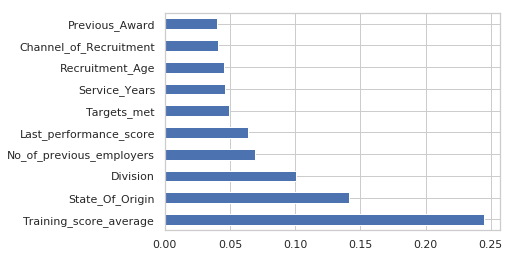

In [69]:
#Feature Selection using Feature Importance property

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #we're using the inbuilt feature importance feature of tree-based classifiers
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

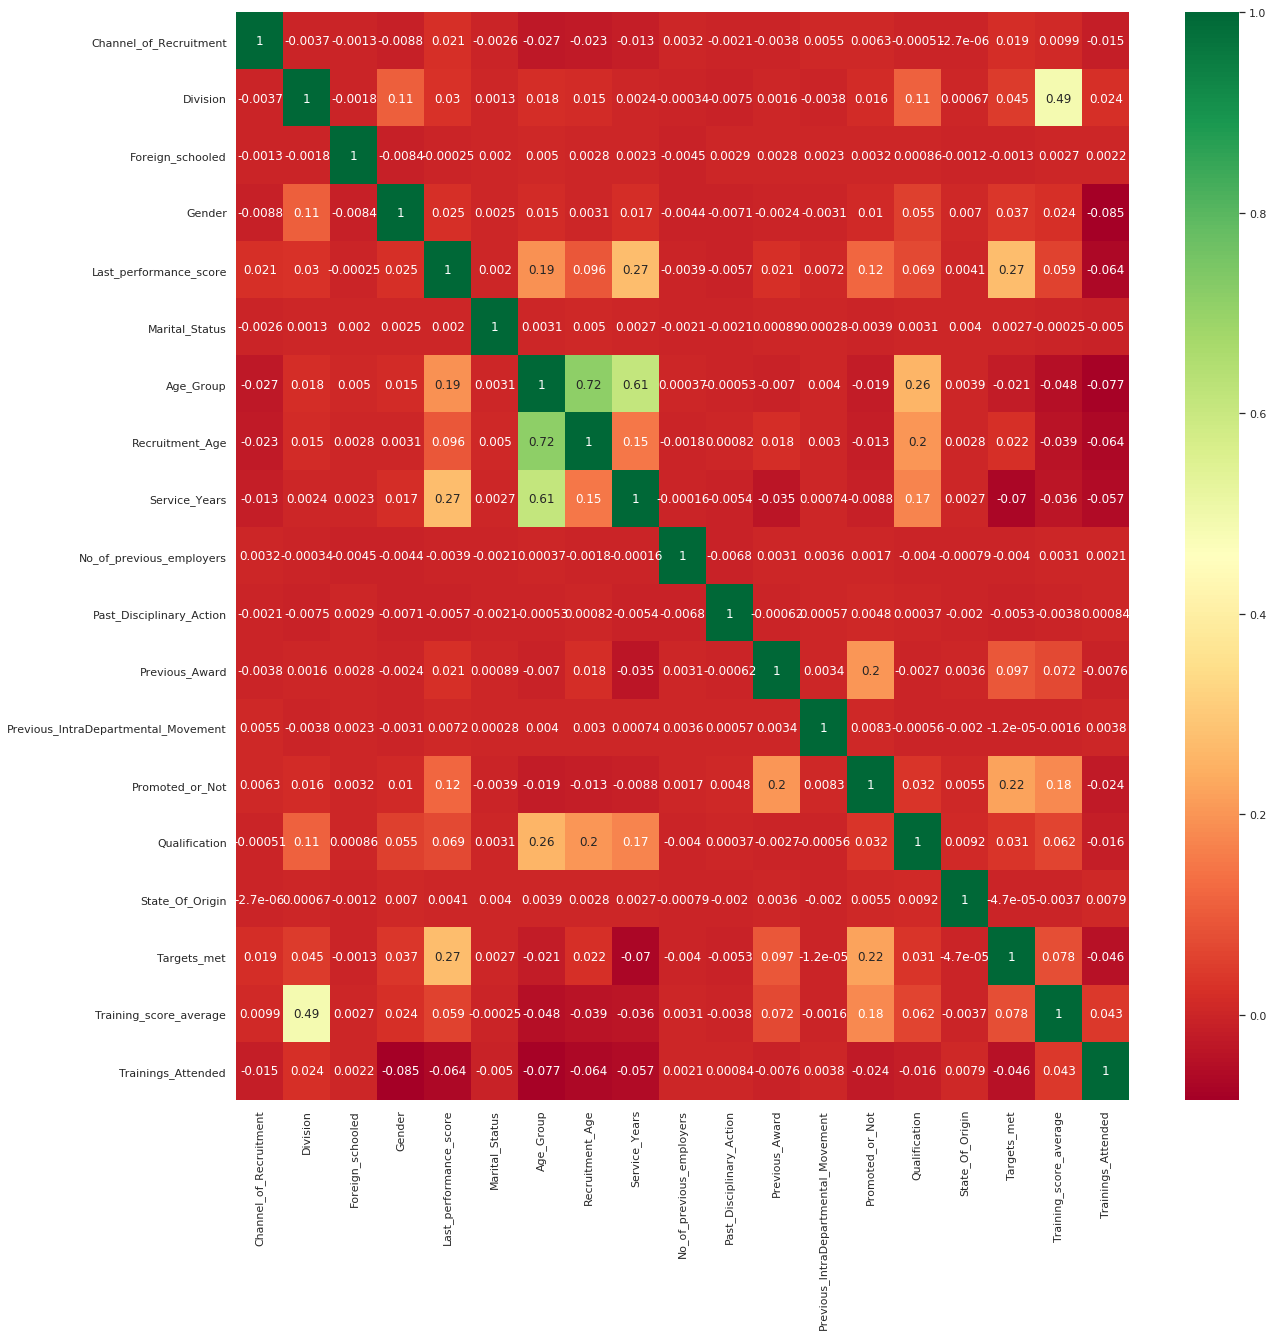

In [70]:
#Feature Selection using Correlation Matrix with Heatmap

corr_matrix2 =df1.corr()
top_features = corr_matrix2.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_features].corr(), annot=True, cmap='RdYlGn'
)

### Fitting the Model

In [71]:
#drop the target variable

#df.drop('Promoted_or_Not', axis=1, inplace=True)

##### Logistic Regression

In [72]:
LogReg = LogisticRegression(solver='sag') # solver='lbfgs'
LogReg.fit(X, y)

/home/jeremiah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
#Predict the test dataset
predictions = LogReg.predict(df2).astype(int)

In [74]:
#Evaluate model performance using mean F1 score
cross_val_score(LogReg, X, y, scoring='f1')

/home/jeremiah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/jeremiah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jeremiah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/jeremiah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([0.10092515, 0.11490425, 0.10989011])

#### Use ensemble methods

In [75]:
#Submit the entry
#os.environ['KAGGLE_USERNAME'] ='oluwabamise'
#os.environ['KAGGLE_KEY'] ='VJ45RMB@U5jKqq6'
#!pip install kaggle

In [76]:
my_submission = pd.DataFrame({'EmployeeNo': my_sub['EmployeeNo'], 'Promoted_or_Not': predictions})

In [77]:
#my_sub['Promoted_or_Not'] = np.around(predictions, 1)

In [78]:
my_submission.to_csv('submission1.csv', index=False)

In [79]:
#!kaggle competitions submit -c intercampusai2019 -f submission1.csv -m ""


In [80]:
subb=pd.read_csv('submission1.csv')

In [81]:
subb['Promoted_or_Not'].value_counts()

0    16336
1      160
Name: Promoted_or_Not, dtype: int64